In [4]:
import sys
import numpy as np
import pandas as pd
import matplotlib as mpl
import sklearn

print('The Python version is {}.\n'.format(sys.version))
print('The Numpy version is {}.\n'.format(np.__version__))
print('The Pandas version is {}.\n'.format(pd.__version__))
print('The Matplotlib version is {}.\n'.format(mpl.__version__))
print('The Scikit-Learn version is {}.\n'.format(sklearn.__version__))
print('The Python version is {}.\n'.format(sys.version))
print('The Numpy version is {}.\n'.format(np.__version__))
print('The Pandas version is {}.\n'.format(pd.__version__))
print('The Matplotlib version is {}.\n'.format(mpl.__version__))
print('The Scikit-Learn version is {}.\n'.format(sklearn.__version__))

The Python version is 3.8.3 (default, Jul  2 2020, 17:30:36) [MSC v.1916 64 bit (AMD64)].

The Numpy version is 1.18.5.

The Pandas version is 1.0.5.

The Matplotlib version is 3.2.2.

The Scikit-Learn version is 0.23.1.

The Python version is 3.8.3 (default, Jul  2 2020, 17:30:36) [MSC v.1916 64 bit (AMD64)].

The Numpy version is 1.18.5.

The Pandas version is 1.0.5.

The Matplotlib version is 3.2.2.

The Scikit-Learn version is 0.23.1.



### 1. Load data and check its original information

In [5]:
#df = pd.read_excel('NHIS_OPEN_GJ_2018.xls',keep_default_na = False)
df = pd.read_excel('NHIS_OPEN_GJ_2018.xls')

In [6]:
df.shape

(65535, 34)

In [7]:
df.info

<bound method DataFrame.info of        기준년도  가입자일련번호  성별코드  연령대코드(5세단위)  시도코드  신장(5Cm단위)  체중(5Kg단위)  허리둘레  \
0      2018    65144     1           10    26        175         70  86.0   
1      2018    64480     1            8    27        170         80  87.0   
2      2018     8848     1           15    45        165         70  89.5   
3      2018    63606     1           13    47        165         55  76.0   
4      2018    33252     2           13    46        145         45  76.0   
...     ...      ...   ...          ...   ...        ...        ...   ...   
65530  2018    64591     1           15    44        165         80  98.0   
65531  2018    64893     2           15    11        160         65  91.0   
65532  2018    65109     1           16    47        160         65  91.0   
65533  2018    65435     2           14    11        155         50  69.0   
65534  2018    65510     2           18    42        145         40  71.0   

       시력(좌)  시력(우)  ...  감마지티피  흡연상태  음주여부

In [8]:
df.columns

Index(['기준년도', '가입자일련번호', '성별코드', '연령대코드(5세단위)', '시도코드', '신장(5Cm단위)',
       '체중(5Kg단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태',
       '음주여부', '구강검진수검여부', '치아우식증유무', '결손치유무', '치아마모증유무', '제3대구치(사랑니)이상', '치석',
       '데이터공개일자'],
      dtype='object')

### 2. Verify basic data integrity

In [9]:
df.head()

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg단위),허리둘레,시력(좌),시력(우),...,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
0,2018,65144,1,10,26,175,70,86.0,0.5,1.0,...,113.0,3.0,1.0,0,NaN,NaN,NaN,NaN,NaN,20191219
1,2018,64480,1,8,27,170,80,87.0,1.0,0.9,...,71.0,3.0,1.0,0,NaN,NaN,NaN,NaN,NaN,20191219
2,2018,8848,1,15,45,165,70,89.5,0.8,0.7,...,30.0,1.0,NaN,0,NaN,NaN,NaN,NaN,NaN,20191219
3,2018,63606,1,13,47,165,55,76.0,1.0,1.0,...,27.0,1.0,1.0,0,NaN,NaN,NaN,NaN,NaN,20191219
4,2018,33252,2,13,46,145,45,76.0,1.2,0.7,...,14.0,1.0,NaN,0,NaN,NaN,NaN,NaN,NaN,20191219


In [10]:
df['가입자일련번호'].nunique()    ##没有重复

65535

In [11]:
id_counts = df['가입자일련번호'].value_counts()   #查看一个Id出现的频率
id_counts.head()

2047     1
10896    1
17053    1
19100    1
29339    1
Name: 가입자일련번호, dtype: int64

### 3.  Exploring and cleaning the data

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65535 entries, 0 to 65534
Data columns (total 34 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   기준년도          65535 non-null  int64  
 1   가입자일련번호       65535 non-null  int64  
 2   성별코드          65535 non-null  int64  
 3   연령대코드(5세단위)   65535 non-null  int64  
 4   시도코드          65535 non-null  int64  
 5   신장(5Cm단위)     65535 non-null  int64  
 6   체중(5Kg단위)     65535 non-null  int64  
 7   허리둘레          65508 non-null  float64
 8   시력(좌)         65517 non-null  float64
 9   시력(우)         65518 non-null  float64
 10  청력(좌)         65521 non-null  float64
 11  청력(우)         65521 non-null  float64
 12  수축기혈압         65145 non-null  float64
 13  이완기혈압         65145 non-null  float64
 14  식전혈당(공복혈당)    65139 non-null  float64
 15  총콜레스테롤        21772 non-null  float64
 16  트리글리세라이드      21772 non-null  float64
 17  HDL콜레스테롤      21772 non-null  float64
 18  LDL콜레스테롤      21370 non-nu

In [13]:
df1 = pd.read_excel('NHIS_OPEN_GJ_2018.xls',keep_default_na = False)

In [14]:
df1_clean_1 = df1.drop(["기준년도","구강검진수검여부","결손치유무","치아마모증유무",
                        "제3대구치(사랑니)이상","데이터공개일자"],axis=1)
#删除列名为handsome和smart的整列

In [15]:
df1_clean_1

,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg단위),허리둘레,시력(좌),시력(우),청력(좌),...,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,치아우식증유무,치석
0,65144,1,10,26,175,70,86,0.5,1,1,...,14.7,1,1.7,33,46,113,3,1,,
1,64480,1,8,27,170,80,87,1,0.9,1,...,16.9,1,0.9,69,66,71,3,1,,
2,8848,1,15,45,165,70,89.5,0.8,0.7,1,...,12.5,1,1.2,28,34,30,1,,,
3,63606,1,13,47,165,55,76,1,1,1,...,15.2,1,1.1,14,13,27,1,1,,
4,33252,2,13,46,145,45,76,1.2,0.7,1,...,11.7,1,0.7,40,20,14,1,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65530,64591,1,15,44,165,80,98,1,1.5,1,...,,,,,,,1,,,
65531,64893,2,15,11,160,65,91,1.5,1,1,...,,,,,,,1,1,,
65532,65109,1,16,47,160,65,91,0.4,0.2,1,...,,,,,,,1,,,
65533,65435,2,14,11,155,50,69,0.4,0.6,1,...,,,,,,,1,,,


In [16]:
 df1_clean_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65535 entries, 0 to 65534
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   가입자일련번호      65535 non-null  int64 
 1   성별코드         65535 non-null  int64 
 2   연령대코드(5세단위)  65535 non-null  int64 
 3   시도코드         65535 non-null  int64 
 4   신장(5Cm단위)    65535 non-null  int64 
 5   체중(5Kg단위)    65535 non-null  int64 
 6   허리둘레         65535 non-null  object
 7   시력(좌)        65535 non-null  object
 8   시력(우)        65535 non-null  object
 9   청력(좌)        65535 non-null  object
 10  청력(우)        65535 non-null  object
 11  수축기혈압        65535 non-null  object
 12  이완기혈압        65535 non-null  object
 13  식전혈당(공복혈당)   65535 non-null  object
 14  총콜레스테롤       65535 non-null  object
 15  트리글리세라이드     65535 non-null  object
 16  HDL콜레스테롤     65535 non-null  object
 17  LDL콜레스테롤     65535 non-null  object
 18  혈색소          65535 non-null  object
 19  요단백          65535 non-nu

In [17]:
df1_clean_1['총콜레스테롤'].value_counts()

       43763
184      264
189      240
210      236
198      235
       ...  
341        1
339        1
336        1
410        1
487        1
Name: 총콜레스테롤, Length: 282, dtype: int64

In [18]:
valid_pay_1_mask = df1_clean_1['총콜레스테롤'] != ''
sum(valid_pay_1_mask)
df1_clean_2 = df1_clean_1.loc[valid_pay_1_mask,:].copy()
df1_clean_2.shape

(21772, 28)

In [19]:
df1_clean_2['총콜레스테롤'].value_counts()

184    264
189    240
210    236
198    235
199    232
      ... 
339      1
336      1
331      1
326      1
72       1
Name: 총콜레스테롤, Length: 281, dtype: int64

In [20]:
df1_clean_2['총콜레스테롤'] = df1_clean_2['총콜레스테롤'].astype('float64')
df1_clean_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21772 entries, 0 to 65136
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   가입자일련번호      21772 non-null  int64  
 1   성별코드         21772 non-null  int64  
 2   연령대코드(5세단위)  21772 non-null  int64  
 3   시도코드         21772 non-null  int64  
 4   신장(5Cm단위)    21772 non-null  int64  
 5   체중(5Kg단위)    21772 non-null  int64  
 6   허리둘레         21772 non-null  object 
 7   시력(좌)        21772 non-null  object 
 8   시력(우)        21772 non-null  object 
 9   청력(좌)        21772 non-null  object 
 10  청력(우)        21772 non-null  object 
 11  수축기혈압        21772 non-null  object 
 12  이완기혈압        21772 non-null  object 
 13  식전혈당(공복혈당)   21772 non-null  object 
 14  총콜레스테롤       21772 non-null  float64
 15  트리글리세라이드     21772 non-null  object 
 16  HDL콜레스테롤     21772 non-null  object 
 17  LDL콜레스테롤     21772 non-null  object 
 18  혈색소          21772 non-null  object 
 19  요단백 

In [21]:
df2 = df1_clean_2
valid_pay_2_mask = df2['허리둘레'] != ''
sum(valid_pay_2_mask)
df1_clean_3 = df2.loc[valid_pay_2_mask,:].copy()
df1_clean_3.shape
df1_clean_3['허리둘레'] = df1_clean_3['허리둘레'].astype('float64')

df3 = df1_clean_3
valid_pay_3_mask = df3['시력(좌)'] != ''
sum(valid_pay_3_mask)
df1_clean_4 = df3.loc[valid_pay_3_mask,:].copy()
df1_clean_4.shape
df1_clean_4['시력(좌)'] = df1_clean_4['시력(좌)'].astype('float64')

df4 = df1_clean_4
valid_pay_4_mask = df4['시력(우)'] != ''
sum(valid_pay_4_mask)
df1_clean_5 = df4.loc[valid_pay_4_mask,:].copy()
df1_clean_5.shape
df1_clean_5['시력(우)'] = df1_clean_5['시력(우)'].astype('float64')

df5 = df1_clean_5
valid_pay_5_mask = df5['청력(좌)'] != ''
sum(valid_pay_5_mask)
df1_clean_6 = df5.loc[valid_pay_5_mask,:].copy()
df1_clean_6.shape
df1_clean_6['청력(좌)'] = df1_clean_6['청력(좌)'].astype('float64')

df6 = df1_clean_6
valid_pay_6_mask = df6['청력(우)'] != ''
sum(valid_pay_6_mask)
df1_clean_7 = df6.loc[valid_pay_6_mask,:].copy()
df1_clean_7.shape
df1_clean_7['청력(우)'] = df1_clean_7['청력(우)'].astype('float64')

df7 = df1_clean_7
valid_pay_7_mask = df7['수축기혈압'] != ''
sum(valid_pay_7_mask)
df1_clean_8 = df7.loc[valid_pay_7_mask,:].copy()
df1_clean_8.shape
df1_clean_8['수축기혈압'] = df1_clean_8['수축기혈압'].astype('float64')

df8 = df1_clean_8
valid_pay_8_mask = df8['이완기혈압'] != ''
sum(valid_pay_8_mask)
df1_clean_9 = df8.loc[valid_pay_8_mask,:].copy()
df1_clean_9.shape
df1_clean_9['이완기혈압'] = df1_clean_9['이완기혈압'].astype('float64')

df9 = df1_clean_9
valid_pay_9_mask = df9['식전혈당(공복혈당)'] != ''
sum(valid_pay_9_mask)
df1_clean_10 = df9.loc[valid_pay_9_mask,:].copy()
df1_clean_10.shape
df1_clean_10['식전혈당(공복혈당)'] = df1_clean_10['식전혈당(공복혈당)'].astype('float64')

df10 = df1_clean_10
valid_pay_10_mask = df10['트리글리세라이드'] != ''
sum(valid_pay_10_mask)
df1_clean_11 = df10.loc[valid_pay_10_mask,:].copy()
df1_clean_11.shape
df1_clean_11['트리글리세라이드'] = df1_clean_11['트리글리세라이드'].astype('float64')

df11 = df1_clean_11
valid_pay_11_mask = df11['HDL콜레스테롤'] != ''
sum(valid_pay_11_mask)
df1_clean_12 = df11.loc[valid_pay_11_mask,:].copy()
df1_clean_12.shape
df1_clean_12['HDL콜레스테롤'] = df1_clean_12['HDL콜레스테롤'].astype('float64')

df12 = df1_clean_12
valid_pay_12_mask = df12['LDL콜레스테롤'] != ''
sum(valid_pay_12_mask)
df1_clean_13 = df12.loc[valid_pay_12_mask,:].copy()
df1_clean_13.shape
df1_clean_13['LDL콜레스테롤'] = df1_clean_13['LDL콜레스테롤'].astype('float64')

df13 = df1_clean_13
valid_pay_13_mask = df13['혈색소'] != ''
sum(valid_pay_13_mask)
df1_clean_14 = df13.loc[valid_pay_13_mask,:].copy()
df1_clean_14.shape
df1_clean_14['혈색소'] = df1_clean_14['혈색소'].astype('float64')

df14 = df1_clean_14
valid_pay_14_mask = df14['요단백'] != ''
sum(valid_pay_14_mask)
df1_clean_15 = df14.loc[valid_pay_14_mask,:].copy()
df1_clean_15.shape
df1_clean_15['요단백'] = df1_clean_15['요단백'].astype('float64')

df15 = df1_clean_15
valid_pay_15_mask = df15['혈청크레아티닌'] != ''
sum(valid_pay_15_mask)
df1_clean_16 = df15.loc[valid_pay_15_mask,:].copy()
df1_clean_16.shape
df1_clean_16['혈청크레아티닌'] = df1_clean_16['혈청크레아티닌'].astype('float64')

df16 = df1_clean_16
valid_pay_16_mask = df16['(혈청지오티)AST'] != ''
sum(valid_pay_16_mask)
df1_clean_17 = df16.loc[valid_pay_16_mask,:].copy()
df1_clean_17.shape
df1_clean_17['(혈청지오티)AST'] = df1_clean_17['(혈청지오티)AST'].astype('float64')

df17 = df1_clean_17
valid_pay_17_mask = df17['(혈청지오티)ALT'] != ''
sum(valid_pay_17_mask)
df1_clean_18 = df17.loc[valid_pay_17_mask,:].copy()
df1_clean_18.shape
df1_clean_18['(혈청지오티)ALT'] = df1_clean_18['(혈청지오티)ALT'].astype('float64')

df18 = df1_clean_18
valid_pay_18_mask = df18['감마지티피'] != ''
sum(valid_pay_18_mask)
df1_clean_19 = df18.loc[valid_pay_18_mask,:].copy()
df1_clean_19.shape
df1_clean_19['감마지티피'] = df1_clean_19['감마지티피'].astype('float64')

df19 = df1_clean_19
valid_pay_19_mask = df19['흡연상태'] != ''
sum(valid_pay_19_mask)
df1_clean_20 = df19.loc[valid_pay_19_mask,:].copy()
df1_clean_20.shape
df1_clean_20['흡연상태'] = df1_clean_20['흡연상태'].astype('float64')

df20 = df1_clean_20
valid_pay_20_mask = df20['음주여부'] != ''
sum(valid_pay_20_mask)
df1_clean_21 = df20.loc[valid_pay_20_mask,:].copy()
df1_clean_21.shape
df1_clean_21['음주여부'] = df1_clean_21['음주여부'].astype('float64')

df21 = df1_clean_21
valid_pay_21_mask = df21['치아우식증유무'] != ''
sum(valid_pay_21_mask)
df1_clean_22 = df21.loc[valid_pay_21_mask,:].copy()
df1_clean_22.shape
df1_clean_22['치아우식증유무'] = df1_clean_22['치아우식증유무'].astype('float64')

df22 = df1_clean_22
valid_pay_22_mask = df22['치석'] != ''
sum(valid_pay_22_mask)
df1_clean_23 = df22.loc[valid_pay_22_mask,:].copy()
df1_clean_23.shape
df1_clean_23['치석'] = df1_clean_23['치석'].astype('float64')

In [22]:
df1_clean_23.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5113 entries, 27 to 65070
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   가입자일련번호      5113 non-null   int64  
 1   성별코드         5113 non-null   int64  
 2   연령대코드(5세단위)  5113 non-null   int64  
 3   시도코드         5113 non-null   int64  
 4   신장(5Cm단위)    5113 non-null   int64  
 5   체중(5Kg단위)    5113 non-null   int64  
 6   허리둘레         5113 non-null   float64
 7   시력(좌)        5113 non-null   float64
 8   시력(우)        5113 non-null   float64
 9   청력(좌)        5113 non-null   float64
 10  청력(우)        5113 non-null   float64
 11  수축기혈압        5113 non-null   float64
 12  이완기혈압        5113 non-null   float64
 13  식전혈당(공복혈당)   5113 non-null   float64
 14  총콜레스테롤       5113 non-null   float64
 15  트리글리세라이드     5113 non-null   float64
 16  HDL콜레스테롤     5113 non-null   float64
 17  LDL콜레스테롤     5113 non-null   float64
 18  혈색소          5113 non-null   float64
 19  요단백 

In [23]:
df1_clean_23.head(5)

,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg단위),허리둘레,시력(좌),시력(우),청력(좌),...,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,치아우식증유무,치석
27,38884,1,13,47,170,70,90.0,1.2,1.0,1.0,...,17.0,1.0,0.8,25.0,22.0,65.0,2.0,1.0,0.0,0.0
53,42822,1,12,41,165,65,81.0,0.8,1.0,2.0,...,17.4,1.0,0.7,31.0,36.0,72.0,1.0,1.0,1.0,0.0
74,30741,1,12,31,170,65,77.0,0.8,0.8,1.0,...,15.1,1.0,1.1,44.0,36.0,100.0,3.0,1.0,0.0,0.0
75,54288,1,9,48,175,100,100.5,0.8,1.5,1.0,...,15.5,1.0,0.8,22.0,31.0,30.0,2.0,1.0,0.0,1.0
84,27322,1,5,29,170,65,81.0,1.5,1.5,1.0,...,16.3,1.0,0.7,15.0,15.0,23.0,3.0,1.0,0.0,1.0


### 4. Implementing other encoding model(One-Hot Encoding)

In [24]:
df1_clean_23['시도코드'].head()

27    47
53    41
74    31
75    48
84    29
Name: 시도코드, dtype: int64

In [25]:
df1_clean_23['시도코드_CAT'] = 'none'

In [26]:
df1_clean_23[['시도코드', '시도코드_CAT']].head(10)

,시도코드,시도코드_CAT
27,47,none
53,41,none
74,31,none
75,48,none
84,29,none
92,41,none
120,41,none
134,30,none
139,50,none
150,42,none


In [27]:
cat_mapping = {
11: "서울특별시",
26: "부산광역시",
27: "대구광역시",
28: "인천광역시",
29: "광주광역시",
30: "대전광역시",
31: "울산광역시",
36: "세종특별자치시",
41: "경기도",
42: "강원도",
43: "충청북도",
44: "충청남도",
45: "전라북도",
46: "전라남도",
47: "경상북도",
48: "경상남도",
49: "제주특별자치도"
}

In [28]:
df1_clean_23['시도코드_CAT'] = df1_clean_23['시도코드'].map(cat_mapping)
df1_clean_23[['시도코드', '시도코드_CAT']].head(10)

,시도코드,시도코드_CAT
27,47,경상북도
53,41,경기도
74,31,울산광역시
75,48,경상남도
84,29,광주광역시
92,41,경기도
120,41,경기도
134,30,대전광역시
139,50,NaN
150,42,강원도


In [29]:
city_ohe = pd.get_dummies(df1_clean_23['시도코드_CAT']) # 범주형 특징 변수(컬럼)을 one-hot encoding으로 만들어줌
city_ohe.head(10)

,강원도,경기도,경상남도,경상북도,광주광역시,대구광역시,대전광역시,부산광역시,서울특별시,세종특별자치시,울산광역시,인천광역시,전라남도,전라북도,충청남도,충청북도
27,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
53,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
74,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
75,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
84,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
92,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
120,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
134,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
139,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
150,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [30]:
df_with_ohe = pd.concat([df1_clean_23, city_ohe], axis=1) # 두개의 DataFrame을 column 축(axis=1)으로 병합

In [31]:
df_with_ohe[['시도코드_CAT','서울특별시','부산광역시','대구광역시','인천광역시','광주광역시',             
             '대전광역시','울산광역시','세종특별자치시','경기도','강원도','충청북도',
             '충청남도','전라북도','전라남도','경상북도','경상남도']].head(10)

,시도코드_CAT,서울특별시,부산광역시,대구광역시,인천광역시,광주광역시,대전광역시,울산광역시,세종특별자치시,경기도,강원도,충청북도,충청남도,전라북도,전라남도,경상북도,경상남도
27,경상북도,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
53,경기도,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
74,울산광역시,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
75,경상남도,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
84,광주광역시,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
92,경기도,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
120,경기도,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
134,대전광역시,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
139,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
150,강원도,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [32]:
df_with_ohe.to_csv('Project_cleaned_data_2.csv', index=False)

In [33]:
df_new = pd.read_csv('Project_cleaned_data_2.csv')

In [34]:
df_new.head()

,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg단위),허리둘레,시력(좌),시력(우),청력(좌),...,대전광역시,부산광역시,서울특별시,세종특별자치시,울산광역시,인천광역시,전라남도,전라북도,충청남도,충청북도
0,38884,1,13,47,170,70,90.0,1.2,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
1,42822,1,12,41,165,65,81.0,0.8,1.0,2.0,...,0,0,0,0,0,0,0,0,0,0
2,30741,1,12,31,170,65,77.0,0.8,0.8,1.0,...,0,0,0,0,1,0,0,0,0,0
3,54288,1,9,48,175,100,100.5,0.8,1.5,1.0,...,0,0,0,0,0,0,0,0,0,0
4,27322,1,5,29,170,65,81.0,1.5,1.5,1.0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
df_new.columns

Index(['가입자일련번호', '성별코드', '연령대코드(5세단위)', '시도코드', '신장(5Cm단위)', '체중(5Kg단위)',
       '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압', '이완기혈압',
       '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤', '혈색소',
       '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태', '음주여부',
       '치아우식증유무', '치석', '시도코드_CAT', '강원도', '경기도', '경상남도', '경상북도', '광주광역시',
       '대구광역시', '대전광역시', '부산광역시', '서울특별시', '세종특별자치시', '울산광역시', '인천광역시', '전라남도',
       '전라북도', '충청남도', '충청북도'],
      dtype='object')

In [36]:
 df_new.shape

(5113, 45)

In [37]:
from sklearn.preprocessing import StandardScaler
import numpy as np

In [38]:
x_np = df_new['신장(5Cm단위)']
x_np

0       170
1       165
2       170
3       175
4       170
       ... 
5108    170
5109    165
5110    170
5111    175
5112    175
Name: 신장(5Cm단위), Length: 5113, dtype: int64

In [39]:
from sklearn import preprocessing
import numpy as np

In [40]:
np_x = df_new[['신장(5Cm단위)','체중(5Kg단위)','허리둘레','수축기혈압','이완기혈압',
       '총콜레스테롤','트리글리세라이드','HDL콜레스테롤',
      'LDL콜레스테롤','(혈청지오티)AST','(혈청지오티)ALT','감마지티피']]
np_x

,신장(5Cm단위),체중(5Kg단위),허리둘레,수축기혈압,이완기혈압,총콜레스테롤,트리글리세라이드,HDL콜레스테롤,LDL콜레스테롤,(혈청지오티)AST,(혈청지오티)ALT,감마지티피
0,170,70,90.0,156.0,89.0,193.0,240.0,51.0,94.0,25.0,22.0,65.0
1,165,65,81.0,160.0,97.0,258.0,134.0,80.0,151.0,31.0,36.0,72.0
2,170,65,77.0,127.0,80.0,249.0,201.0,70.0,139.0,44.0,36.0,100.0
3,175,100,100.5,116.0,70.0,159.0,345.0,38.0,52.0,22.0,31.0,30.0
4,170,65,81.0,138.0,88.0,130.0,166.0,37.0,58.0,15.0,15.0,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5108,170,70,80.0,128.0,70.0,161.0,88.0,51.0,92.0,19.0,13.0,24.0
5109,165,55,73.2,120.0,80.0,137.0,35.0,57.0,73.0,17.0,12.0,14.0
5110,170,60,91.0,138.0,89.0,202.0,95.0,79.0,104.0,38.0,44.0,150.0
5111,175,75,88.0,121.0,79.0,180.0,83.0,46.0,117.0,31.0,34.0,52.0


In [41]:
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(1,20))
X_min_max = min_max_scaler.fit_transform(np_x)
print(X_min_max)

[[12.4         8.82352941 11.59432387 ...  2.16606498  1.58727273
   2.14688129]
 [10.5         7.70588235  8.73956594 ...  2.57761733  2.07090909
   2.2806841 ]
 [12.4         7.70588235  7.47078464 ...  3.46931408  2.07090909
   2.81589537]
 ...
 [12.4         6.58823529 11.9115192  ...  3.05776173  2.34727273
   3.77162978]
 [14.3         9.94117647 10.95993322 ...  2.57761733  2.00181818
   1.89839034]
 [14.3         6.58823529  5.63105175 ...  1.68592058  1.27636364
   1.17203219]]


In [42]:
y = pd.DataFrame(X_min_max, columns=["신장(5Cm단위)","체중(5Kg단위)",
                                     "허리둘레","수축기혈압","이완기혈압",
                                     "총콜레스테롤",
                                     "트리글리세라이드","HDL콜레스테롤",
                                     "LDL콜레스테롤",
                                     "(혈청지오티)AST",
                                     "(혈청지오티)ALT","감마지티피"])
y

,신장(5Cm단위),체중(5Kg단위),허리둘레,수축기혈압,이완기혈압,총콜레스테롤,트리글리세라이드,HDL콜레스테롤,LDL콜레스테롤,(혈청지오티)AST,(혈청지오티)ALT,감마지티피
0,12.4,8.823529,11.594324,12.220472,9.277228,7.801775,10.372197,7.129032,2.000000,2.166065,1.587273,2.146881
1,10.5,7.705882,8.739566,12.818898,10.782178,11.455621,5.856502,11.572581,2.655172,2.577617,2.070909,2.280684
2,12.4,7.705882,7.470785,7.881890,7.584158,10.949704,8.710762,10.040323,2.517241,3.469314,2.070909,2.815895
3,14.3,15.529412,14.924875,6.236220,5.702970,5.890533,14.845291,5.137097,1.517241,1.960289,1.898182,1.477867
4,12.4,7.705882,8.739566,9.527559,9.089109,4.260355,7.219731,4.983871,1.586207,1.480144,1.345455,1.344064
...,...,...,...,...,...,...,...,...,...,...,...,...
5108,12.4,8.823529,8.422371,8.031496,5.702970,6.002959,3.896861,7.129032,1.977011,1.754513,1.276364,1.363179
5109,10.5,5.470588,6.265442,6.834646,7.584158,4.653846,1.639013,8.048387,1.758621,1.617329,1.241818,1.172032
5110,12.4,6.588235,11.911519,9.527559,9.277228,8.307692,4.195067,11.419355,2.114943,3.057762,2.347273,3.771630
5111,14.3,9.941176,10.959933,6.984252,7.396040,7.071006,3.683857,6.362903,2.264368,2.577617,2.001818,1.898390


In [43]:
np_x2 = df_new[['가입자일련번호','성별코드','연령대코드(5세단위)','시력(좌)','시력(우)',
       '청력(좌)','청력(우)','식전혈당(공복혈당)','혈색소','요단백',
      '혈청크레아티닌','흡연상태','음주여부','치아우식증유무','치석']]
np_x2

,가입자일련번호,성별코드,연령대코드(5세단위),시력(좌),시력(우),청력(좌),청력(우),식전혈당(공복혈당),혈색소,요단백,혈청크레아티닌,흡연상태,음주여부,치아우식증유무,치석
0,38884,1,13,1.2,1.0,1.0,1.0,353.0,17.0,1.0,0.8,2.0,1.0,0.0,0.0
1,42822,1,12,0.8,1.0,2.0,1.0,324.0,17.4,1.0,0.7,1.0,1.0,1.0,0.0
2,30741,1,12,0.8,0.8,1.0,1.0,315.0,15.1,1.0,1.1,3.0,1.0,0.0,0.0
3,54288,1,9,0.8,1.5,1.0,1.0,314.0,15.5,1.0,0.8,2.0,1.0,0.0,1.0
4,27322,1,5,1.5,1.5,1.0,1.0,308.0,16.3,1.0,0.7,3.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5108,55927,1,8,1.5,1.5,1.0,1.0,65.0,15.5,1.0,0.8,3.0,1.0,0.0,0.0
5109,60315,1,5,1.5,1.2,1.0,1.0,64.0,15.9,1.0,1.0,3.0,1.0,1.0,1.0
5110,63390,1,16,1.0,1.0,1.0,1.0,64.0,17.0,1.0,0.6,3.0,1.0,0.0,1.0
5111,21216,1,9,0.9,0.8,1.0,1.0,63.0,16.2,1.0,0.9,1.0,1.0,0.0,0.0


In [44]:
y.to_csv('Project_cleaned_data_3.csv', index=False)
np_x2.to_csv('Project_cleaned_data_4.csv', index=False)

In [45]:
file = pd.read_csv('Project_cleaned_data_4.csv')

In [46]:
file.head()

,가입자일련번호,성별코드,연령대코드(5세단위),시력(좌),시력(우),청력(좌),청력(우),식전혈당(공복혈당),혈색소,요단백,혈청크레아티닌,흡연상태,음주여부,치아우식증유무,치석
0,38884,1,13,1.2,1.0,1.0,1.0,353.0,17.0,1.0,0.8,2.0,1.0,0.0,0.0
1,42822,1,12,0.8,1.0,2.0,1.0,324.0,17.4,1.0,0.7,1.0,1.0,1.0,0.0
2,30741,1,12,0.8,0.8,1.0,1.0,315.0,15.1,1.0,1.1,3.0,1.0,0.0,0.0
3,54288,1,9,0.8,1.5,1.0,1.0,314.0,15.5,1.0,0.8,2.0,1.0,0.0,1.0
4,27322,1,5,1.5,1.5,1.0,1.0,308.0,16.3,1.0,0.7,3.0,1.0,0.0,1.0


In [47]:
import pandas as pd
 
file1=pd.read_csv('Project_cleaned_data_4.csv')
file2=pd.read_csv('Project_cleaned_data_3.csv')
data=file1.join(file2)
#df1=df1.drop('score',axis=1)
print(data)
data.to_csv('data.csv',index=False)

      가입자일련번호  성별코드  연령대코드(5세단위)  시력(좌)  시력(우)  청력(좌)  청력(우)  식전혈당(공복혈당)  \
0       38884     1           13    1.2    1.0    1.0    1.0       353.0   
1       42822     1           12    0.8    1.0    2.0    1.0       324.0   
2       30741     1           12    0.8    0.8    1.0    1.0       315.0   
3       54288     1            9    0.8    1.5    1.0    1.0       314.0   
4       27322     1            5    1.5    1.5    1.0    1.0       308.0   
...       ...   ...          ...    ...    ...    ...    ...         ...   
5108    55927     1            8    1.5    1.5    1.0    1.0        65.0   
5109    60315     1            5    1.5    1.2    1.0    1.0        64.0   
5110    63390     1           16    1.0    1.0    1.0    1.0        64.0   
5111    21216     1            9    0.9    0.8    1.0    1.0        63.0   
5112    31781     1            6    1.5    1.2    1.0    1.0        62.0   

       혈색소  요단백  ...       허리둘레      수축기혈압      이완기혈압     총콜레스테롤   트리글리세라이드  \
0     17

In [48]:
final_file = pd.read_csv('data.csv')
final_file

,가입자일련번호,성별코드,연령대코드(5세단위),시력(좌),시력(우),청력(좌),청력(우),식전혈당(공복혈당),혈색소,요단백,...,허리둘레,수축기혈압,이완기혈압,총콜레스테롤,트리글리세라이드,HDL콜레스테롤,LDL콜레스테롤,(혈청지오티)AST,(혈청지오티)ALT,감마지티피
0,38884,1,13,1.2,1.0,1.0,1.0,353.0,17.0,1.0,...,11.594324,12.220472,9.277228,7.801775,10.372197,7.129032,2.000000,2.166065,1.587273,2.146881
1,42822,1,12,0.8,1.0,2.0,1.0,324.0,17.4,1.0,...,8.739566,12.818898,10.782178,11.455621,5.856502,11.572581,2.655172,2.577617,2.070909,2.280684
2,30741,1,12,0.8,0.8,1.0,1.0,315.0,15.1,1.0,...,7.470785,7.881890,7.584158,10.949704,8.710762,10.040323,2.517241,3.469314,2.070909,2.815895
3,54288,1,9,0.8,1.5,1.0,1.0,314.0,15.5,1.0,...,14.924875,6.236220,5.702970,5.890533,14.845291,5.137097,1.517241,1.960289,1.898182,1.477867
4,27322,1,5,1.5,1.5,1.0,1.0,308.0,16.3,1.0,...,8.739566,9.527559,9.089109,4.260355,7.219731,4.983871,1.586207,1.480144,1.345455,1.344064
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5108,55927,1,8,1.5,1.5,1.0,1.0,65.0,15.5,1.0,...,8.422371,8.031496,5.702970,6.002959,3.896861,7.129032,1.977011,1.754513,1.276364,1.363179
5109,60315,1,5,1.5,1.2,1.0,1.0,64.0,15.9,1.0,...,6.265442,6.834646,7.584158,4.653846,1.639013,8.048387,1.758621,1.617329,1.241818,1.172032
5110,63390,1,16,1.0,1.0,1.0,1.0,64.0,17.0,1.0,...,11.911519,9.527559,9.277228,8.307692,4.195067,11.419355,2.114943,3.057762,2.347273,3.771630
5111,21216,1,9,0.9,0.8,1.0,1.0,63.0,16.2,1.0,...,10.959933,6.984252,7.396040,7.071006,3.683857,6.362903,2.264368,2.577617,2.001818,1.898390


In [49]:
columns_name=['가입자일련번호','성별코드','연령대코드(5세단위','시력(좌)','시력(우)','청력(좌)','청력(우)',
              'A','혈색소','요단백','혈청크레아티닌','흡연상태','음주여부','치아우식증유무',
              '치석','신장(5Cm단위)','체중(5Kg단위)','허리둘레','수축기혈압','이완기혈압','총콜레스테롤','트리글리세라이드','HDL콜레스테롤',
              'LDL콜레스테롤','(혈청지오티)AST','(혈청지오티)ALT','감마지티피']
final_file.columns

Index(['가입자일련번호', '성별코드', '연령대코드(5세단위)', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)',
       '식전혈당(공복혈당)', '혈색소', '요단백', '혈청크레아티닌', '흡연상태', '음주여부', '치아우식증유무', '치석',
       '신장(5Cm단위)', '체중(5Kg단위)', '허리둘레', '수축기혈압', '이완기혈압', '총콜레스테롤',
       '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤', '(혈청지오티)AST', '(혈청지오티)ALT',
       '감마지티피'],
      dtype='object')

In [50]:
final_file.columns =columns_name

In [51]:
target1 = final_file.loc[final_file.A > 125, ['가입자일련번호','성별코드','연령대코드(5세단위','시력(좌)','시력(우)','청력(좌)','청력(우)',
              'A','혈색소','요단백','혈청크레아티닌','흡연상태','음주여부','치아우식증유무',
              '치석','신장(5Cm단위)','체중(5Kg단위)','허리둘레','수축기혈압','이완기혈압','총콜레스테롤','트리글리세라이드','HDL콜레스테롤',
              'LDL콜레스테롤','(혈청지오티)AST','(혈청지오티)ALT','감마지티피']]

In [52]:
target1['target'] = 'none'

In [53]:
target1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 348 entries, 0 to 347
Data columns (total 28 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   가입자일련번호     348 non-null    int64  
 1   성별코드        348 non-null    int64  
 2   연령대코드(5세단위  348 non-null    int64  
 3   시력(좌)       348 non-null    float64
 4   시력(우)       348 non-null    float64
 5   청력(좌)       348 non-null    float64
 6   청력(우)       348 non-null    float64
 7   A           348 non-null    float64
 8   혈색소         348 non-null    float64
 9   요단백         348 non-null    float64
 10  혈청크레아티닌     348 non-null    float64
 11  흡연상태        348 non-null    float64
 12  음주여부        348 non-null    float64
 13  치아우식증유무     348 non-null    float64
 14  치석          348 non-null    float64
 15  신장(5Cm단위)   348 non-null    float64
 16  체중(5Kg단위)   348 non-null    float64
 17  허리둘레        348 non-null    float64
 18  수축기혈압       348 non-null    float64
 19  이완기혈압       348 non-null    f

In [54]:
target1['target'] = target1['A'].isna().map({True:0, False:1})

In [55]:
target1

,가입자일련번호,성별코드,연령대코드(5세단위,시력(좌),시력(우),청력(좌),청력(우),A,혈색소,요단백,...,수축기혈압,이완기혈압,총콜레스테롤,트리글리세라이드,HDL콜레스테롤,LDL콜레스테롤,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,target
0,38884,1,13,1.2,1.0,1.0,1.0,353.0,17.0,1.0,...,12.220472,9.277228,7.801775,10.372197,7.129032,2.000000,2.166065,1.587273,2.146881,1
1,42822,1,12,0.8,1.0,2.0,1.0,324.0,17.4,1.0,...,12.818898,10.782178,11.455621,5.856502,11.572581,2.655172,2.577617,2.070909,2.280684,1
2,30741,1,12,0.8,0.8,1.0,1.0,315.0,15.1,1.0,...,7.881890,7.584158,10.949704,8.710762,10.040323,2.517241,3.469314,2.070909,2.815895,1
3,54288,1,9,0.8,1.5,1.0,1.0,314.0,15.5,1.0,...,6.236220,5.702970,5.890533,14.845291,5.137097,1.517241,1.960289,1.898182,1.477867,1
4,27322,1,5,1.5,1.5,1.0,1.0,308.0,16.3,1.0,...,9.527559,9.089109,4.260355,7.219731,4.983871,1.586207,1.480144,1.345455,1.344064,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,48540,1,12,1.2,1.0,1.0,1.0,126.0,16.4,1.0,...,8.181102,8.336634,5.778107,6.282511,7.588710,1.770115,2.851986,2.450909,2.529175,1
344,52348,2,13,1.0,1.0,1.0,1.0,126.0,13.7,1.0,...,8.779528,5.514851,6.059172,4.621076,6.516129,2.000000,1.960289,1.483636,1.133803,1
345,52373,1,14,0.5,1.0,1.0,1.0,126.0,13.1,1.0,...,8.480315,6.267327,7.183432,6.282511,9.120968,1.942529,6.967509,5.490909,14.265594,1
346,54412,1,13,0.6,1.2,1.0,1.0,126.0,13.8,1.0,...,10.275591,9.089109,7.576923,14.973094,7.282258,1.689655,2.234657,2.312727,2.108652,1


In [56]:
target2 = final_file.loc[final_file.A <= 125, ['가입자일련번호','성별코드','연령대코드(5세단위','시력(좌)','시력(우)','청력(좌)','청력(우)',
              'A','혈색소','요단백','혈청크레아티닌','흡연상태','음주여부','치아우식증유무',
              '치석','신장(5Cm단위)','체중(5Kg단위)','허리둘레','수축기혈압','이완기혈압','총콜레스테롤','트리글리세라이드','HDL콜레스테롤',
              'LDL콜레스테롤','(혈청지오티)AST','(혈청지오티)ALT','감마지티피']]
target2

,가입자일련번호,성별코드,연령대코드(5세단위,시력(좌),시력(우),청력(좌),청력(우),A,혈색소,요단백,...,허리둘레,수축기혈압,이완기혈압,총콜레스테롤,트리글리세라이드,HDL콜레스테롤,LDL콜레스테롤,(혈청지오티)AST,(혈청지오티)ALT,감마지티피
348,3884,2,13,0.3,0.2,1.0,1.0,125.0,11.3,1.0,...,4.616027,6.535433,2.693069,3.136095,3.556054,4.217742,1.632184,2.097473,1.276364,1.172032
349,10868,1,14,0.9,1.0,1.0,1.0,125.0,12.9,1.0,...,4.933222,3.842520,3.821782,3.304734,2.278027,4.677419,1.701149,2.166065,1.932727,1.210262
350,14637,1,11,1.0,1.2,1.0,1.0,125.0,15.4,1.0,...,17.938230,9.078740,8.524752,5.721893,4.791480,8.048387,1.804598,2.166065,2.070909,1.267606
351,15359,1,11,0.3,0.7,1.0,1.0,125.0,14.7,1.0,...,8.422371,9.078740,9.277228,7.464497,6.197309,6.362903,2.206897,2.851986,1.552727,2.452716
352,22086,1,9,1.2,1.2,1.0,1.0,125.0,16.4,1.0,...,10.959933,6.535433,7.584158,8.195266,4.450673,6.056452,2.471264,1.823105,1.310909,1.420523
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5108,55927,1,8,1.5,1.5,1.0,1.0,65.0,15.5,1.0,...,8.422371,8.031496,5.702970,6.002959,3.896861,7.129032,1.977011,1.754513,1.276364,1.363179
5109,60315,1,5,1.5,1.2,1.0,1.0,64.0,15.9,1.0,...,6.265442,6.834646,7.584158,4.653846,1.639013,8.048387,1.758621,1.617329,1.241818,1.172032
5110,63390,1,16,1.0,1.0,1.0,1.0,64.0,17.0,1.0,...,11.911519,9.527559,9.277228,8.307692,4.195067,11.419355,2.114943,3.057762,2.347273,3.771630
5111,21216,1,9,0.9,0.8,1.0,1.0,63.0,16.2,1.0,...,10.959933,6.984252,7.396040,7.071006,3.683857,6.362903,2.264368,2.577617,2.001818,1.898390


In [57]:
target2['target'] = 'none'
target2

,가입자일련번호,성별코드,연령대코드(5세단위,시력(좌),시력(우),청력(좌),청력(우),A,혈색소,요단백,...,수축기혈압,이완기혈압,총콜레스테롤,트리글리세라이드,HDL콜레스테롤,LDL콜레스테롤,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,target
348,3884,2,13,0.3,0.2,1.0,1.0,125.0,11.3,1.0,...,6.535433,2.693069,3.136095,3.556054,4.217742,1.632184,2.097473,1.276364,1.172032,none
349,10868,1,14,0.9,1.0,1.0,1.0,125.0,12.9,1.0,...,3.842520,3.821782,3.304734,2.278027,4.677419,1.701149,2.166065,1.932727,1.210262,none
350,14637,1,11,1.0,1.2,1.0,1.0,125.0,15.4,1.0,...,9.078740,8.524752,5.721893,4.791480,8.048387,1.804598,2.166065,2.070909,1.267606,none
351,15359,1,11,0.3,0.7,1.0,1.0,125.0,14.7,1.0,...,9.078740,9.277228,7.464497,6.197309,6.362903,2.206897,2.851986,1.552727,2.452716,none
352,22086,1,9,1.2,1.2,1.0,1.0,125.0,16.4,1.0,...,6.535433,7.584158,8.195266,4.450673,6.056452,2.471264,1.823105,1.310909,1.420523,none
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5108,55927,1,8,1.5,1.5,1.0,1.0,65.0,15.5,1.0,...,8.031496,5.702970,6.002959,3.896861,7.129032,1.977011,1.754513,1.276364,1.363179,none
5109,60315,1,5,1.5,1.2,1.0,1.0,64.0,15.9,1.0,...,6.834646,7.584158,4.653846,1.639013,8.048387,1.758621,1.617329,1.241818,1.172032,none
5110,63390,1,16,1.0,1.0,1.0,1.0,64.0,17.0,1.0,...,9.527559,9.277228,8.307692,4.195067,11.419355,2.114943,3.057762,2.347273,3.771630,none
5111,21216,1,9,0.9,0.8,1.0,1.0,63.0,16.2,1.0,...,6.984252,7.396040,7.071006,3.683857,6.362903,2.264368,2.577617,2.001818,1.898390,none


In [58]:
target2['target'] = target2['A'].isna().map({True:1, False:0})

In [59]:
target2

,가입자일련번호,성별코드,연령대코드(5세단위,시력(좌),시력(우),청력(좌),청력(우),A,혈색소,요단백,...,수축기혈압,이완기혈압,총콜레스테롤,트리글리세라이드,HDL콜레스테롤,LDL콜레스테롤,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,target
348,3884,2,13,0.3,0.2,1.0,1.0,125.0,11.3,1.0,...,6.535433,2.693069,3.136095,3.556054,4.217742,1.632184,2.097473,1.276364,1.172032,0
349,10868,1,14,0.9,1.0,1.0,1.0,125.0,12.9,1.0,...,3.842520,3.821782,3.304734,2.278027,4.677419,1.701149,2.166065,1.932727,1.210262,0
350,14637,1,11,1.0,1.2,1.0,1.0,125.0,15.4,1.0,...,9.078740,8.524752,5.721893,4.791480,8.048387,1.804598,2.166065,2.070909,1.267606,0
351,15359,1,11,0.3,0.7,1.0,1.0,125.0,14.7,1.0,...,9.078740,9.277228,7.464497,6.197309,6.362903,2.206897,2.851986,1.552727,2.452716,0
352,22086,1,9,1.2,1.2,1.0,1.0,125.0,16.4,1.0,...,6.535433,7.584158,8.195266,4.450673,6.056452,2.471264,1.823105,1.310909,1.420523,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5108,55927,1,8,1.5,1.5,1.0,1.0,65.0,15.5,1.0,...,8.031496,5.702970,6.002959,3.896861,7.129032,1.977011,1.754513,1.276364,1.363179,0
5109,60315,1,5,1.5,1.2,1.0,1.0,64.0,15.9,1.0,...,6.834646,7.584158,4.653846,1.639013,8.048387,1.758621,1.617329,1.241818,1.172032,0
5110,63390,1,16,1.0,1.0,1.0,1.0,64.0,17.0,1.0,...,9.527559,9.277228,8.307692,4.195067,11.419355,2.114943,3.057762,2.347273,3.771630,0
5111,21216,1,9,0.9,0.8,1.0,1.0,63.0,16.2,1.0,...,6.984252,7.396040,7.071006,3.683857,6.362903,2.264368,2.577617,2.001818,1.898390,0


In [70]:
target1.to_csv('target1.csv', index=False)
target2.to_csv('target2.csv', index=False)

In [72]:
target_final1 = pd.read_csv('target1.csv')
target_final2 = pd.read_csv('target2.csv')

In [73]:
frames = [target_final1, target_final2]
all_csv = pd.concat(frames)

In [74]:
all_csv

,가입자일련번호,성별코드,연령대코드(5세단위,시력(좌),시력(우),청력(좌),청력(우),A,혈색소,요단백,...,수축기혈압,이완기혈압,총콜레스테롤,트리글리세라이드,HDL콜레스테롤,LDL콜레스테롤,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,target
0,38884,1,13,1.2,1.0,1.0,1.0,353.0,17.0,1.0,...,12.220472,9.277228,7.801775,10.372197,7.129032,2.000000,2.166065,1.587273,2.146881,1
1,42822,1,12,0.8,1.0,2.0,1.0,324.0,17.4,1.0,...,12.818898,10.782178,11.455621,5.856502,11.572581,2.655172,2.577617,2.070909,2.280684,1
2,30741,1,12,0.8,0.8,1.0,1.0,315.0,15.1,1.0,...,7.881890,7.584158,10.949704,8.710762,10.040323,2.517241,3.469314,2.070909,2.815895,1
3,54288,1,9,0.8,1.5,1.0,1.0,314.0,15.5,1.0,...,6.236220,5.702970,5.890533,14.845291,5.137097,1.517241,1.960289,1.898182,1.477867,1
4,27322,1,5,1.5,1.5,1.0,1.0,308.0,16.3,1.0,...,9.527559,9.089109,4.260355,7.219731,4.983871,1.586207,1.480144,1.345455,1.344064,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4760,55927,1,8,1.5,1.5,1.0,1.0,65.0,15.5,1.0,...,8.031496,5.702970,6.002959,3.896861,7.129032,1.977011,1.754513,1.276364,1.363179,0
4761,60315,1,5,1.5,1.2,1.0,1.0,64.0,15.9,1.0,...,6.834646,7.584158,4.653846,1.639013,8.048387,1.758621,1.617329,1.241818,1.172032,0
4762,63390,1,16,1.0,1.0,1.0,1.0,64.0,17.0,1.0,...,9.527559,9.277228,8.307692,4.195067,11.419355,2.114943,3.057762,2.347273,3.771630,0
4763,21216,1,9,0.9,0.8,1.0,1.0,63.0,16.2,1.0,...,6.984252,7.396040,7.071006,3.683857,6.362903,2.264368,2.577617,2.001818,1.898390,0


In [75]:
all_csv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5113 entries, 0 to 4764
Data columns (total 28 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   가입자일련번호     5113 non-null   int64  
 1   성별코드        5113 non-null   int64  
 2   연령대코드(5세단위  5113 non-null   int64  
 3   시력(좌)       5113 non-null   float64
 4   시력(우)       5113 non-null   float64
 5   청력(좌)       5113 non-null   float64
 6   청력(우)       5113 non-null   float64
 7   A           5113 non-null   float64
 8   혈색소         5113 non-null   float64
 9   요단백         5113 non-null   float64
 10  혈청크레아티닌     5113 non-null   float64
 11  흡연상태        5113 non-null   float64
 12  음주여부        5113 non-null   float64
 13  치아우식증유무     5113 non-null   float64
 14  치석          5113 non-null   float64
 15  신장(5Cm단위)   5113 non-null   float64
 16  체중(5Kg단위)   5113 non-null   float64
 17  허리둘레        5113 non-null   float64
 18  수축기혈압       5113 non-null   float64
 19  이완기혈압       5113 non-null  

In [76]:
all_csv.to_csv('target_final.csv', index=False)

In [77]:
feature_names = ['성별코드','연령대코드(5세단위','시력(좌)','시력(우)','청력(좌)','청력(우)',
              'A','혈색소','요단백','혈청크레아티닌','흡연상태','음주여부','치아우식증유무',
              '치석','신장(5Cm단위)','체중(5Kg단위)','허리둘레','수축기혈압','이완기혈압','총콜레스테롤','트리글리세라이드','HDL콜레스테롤',
              'LDL콜레스테롤','(혈청지오티)AST','(혈청지오티)ALT','감마지티피','target']
X = pd.read_csv("target_final.csv", header=0, names=feature_names)
y = X["target"]  # target
X.drop(["target"], axis=1, inplace=True) # target class 제외한 X feature
X.head()
X.shape

(5113, 26)

In [78]:
print(type(y))
y.head()

<class 'pandas.core.series.Series'>


38884    1
42822    1
30741    1
54288    1
27322    1
Name: target, dtype: int64

In [79]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5113 entries, 38884 to 31781
Data columns (total 26 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   성별코드        5113 non-null   int64  
 1   연령대코드(5세단위  5113 non-null   int64  
 2   시력(좌)       5113 non-null   float64
 3   시력(우)       5113 non-null   float64
 4   청력(좌)       5113 non-null   float64
 5   청력(우)       5113 non-null   float64
 6   A           5113 non-null   float64
 7   혈색소         5113 non-null   float64
 8   요단백         5113 non-null   float64
 9   혈청크레아티닌     5113 non-null   float64
 10  흡연상태        5113 non-null   float64
 11  음주여부        5113 non-null   float64
 12  치아우식증유무     5113 non-null   float64
 13  치석          5113 non-null   float64
 14  신장(5Cm단위)   5113 non-null   float64
 15  체중(5Kg단위)   5113 non-null   float64
 16  허리둘레        5113 non-null   float64
 17  수축기혈압       5113 non-null   float64
 18  이완기혈압       5113 non-null   float64
 19  총콜레스테롤      5113 non-n

In [80]:
X.describe()

,성별코드,연령대코드(5세단위,시력(좌),시력(우),청력(좌),청력(우),A,혈색소,요단백,혈청크레아티닌,...,허리둘레,수축기혈압,이완기혈압,총콜레스테롤,트리글리세라이드,HDL콜레스테롤,LDL콜레스테롤,(혈청지오티)AST,(혈청지오티)ALT,감마지티피
count,5113.000000,5113.000000,5113.000000,5113.000000,5113.000000,5113.000000,5113.000000,5113.000000,5113.000000,5113.000000,...,5113.000000,5113.000000,5113.000000,5113.000000,5113.000000,5113.000000,5113.000000,5113.000000,5113.000000,5113.000000
mean,1.274985,10.040681,1.001682,1.005163,1.030119,1.029533,100.558185,14.773323,1.097594,0.908997,...,9.377915,7.230270,6.978043,8.009432,5.669510,7.980750,2.249769,2.265861,1.785120,1.724855
std,0.446551,2.449631,0.466919,0.555652,0.170932,0.169310,20.818121,1.496813,0.430703,0.199915,...,2.936136,2.062210,1.850286,2.051854,3.079935,2.132312,0.611358,0.899450,0.735427,1.000353
min,1.000000,5.000000,0.100000,0.100000,1.000000,1.000000,62.000000,5.500000,1.000000,0.100000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,9.000000,0.800000,0.800000,1.000000,1.000000,90.000000,13.800000,1.000000,0.800000,...,7.407346,5.787402,5.702970,6.621302,3.428251,6.516129,1.965517,1.823105,1.380000,1.248491
50%,1.000000,10.000000,1.000000,1.000000,1.000000,1.000000,97.000000,15.000000,1.000000,0.900000,...,9.373957,6.984252,7.019802,7.857988,4.834081,7.588710,2.218391,2.097473,1.587273,1.439638
75%,2.000000,12.000000,1.200000,1.200000,1.000000,1.000000,105.000000,15.800000,1.000000,1.000000,...,11.277129,8.480315,8.148515,9.319527,7.091928,9.274194,2.482759,2.440433,1.932727,1.821932
max,2.000000,18.000000,9.900000,9.900000,2.000000,2.000000,353.000000,19.500000,6.000000,3.400000,...,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000


In [81]:
def entropy(y):
    probs = []        # Probabilities of each class label # List
    for c in set(y): # set() 순서가없고 중복허용하지 않음 {} # Set gets a unique set of values. We're iterating over each value ==> e, p 
        # print(f'c:{c}')
        
        num_same_class = sum(y == c)  # y == c : boolean mask # Remember that true == 1, so we can sum.
        # print(f'{num_same_class}')    # 4208                 # 3915
        
        # Probability of this class label
        p = num_same_class / len(y)
        # print(f'{p}')                 # 0.5180352086667488  #0.48196479133325126
        
        probs.append(p)
    # print(f'{probs}') # [0.5180352086667488, 0.48196479133325126]
    
    # entropy return
    return np.sum(-p * np.log2(p) for p in probs)

# print(f'{entropy(y)}')  # 0.9990612691483578
# print(f'{entropy(y):.2f}') # 1.00

In [82]:
# 각 feature의 요소에 대한 y값 확률 list  # value_counts() 값으로 이해
def class_probability(feature, y):
    """Calculates the proportional length of each value in the set of instances"""
    probs = []
    for value in set(feature): 
        
        # boolean mask
        select = feature == value # Split by feature value into two classes
        y_new = y[select]         # Those that exist in this class are now in y_new
        probs.append(float(len(y_new))/len(X))  # Convert to float, because ints don't divide well
    return probs
# class_probability(X['cap-shape'], y)

In [83]:
# 각 feature별 요소에 대한 entropy계산 list
def class_entropy(feature, y):
    """Calculates the entropy for each value in the set of instances"""
    ents = []
    for value in set(feature):
        select = feature == value # Split by feature value into two classes
        y_new = y[select]         # Those that exist in this class are now in y_new
        ents.append(entropy(y_new))
    return ents

In [84]:
def proportionate_class_entropy(feature, y):
    """Calculatates the weighted proportional entropy for a feature when splitting on all values"""
    probs = class_probability(feature, y)
    ents = class_entropy(feature, y)
    return np.sum(np.multiply(probs, ents)) 

In [85]:
new_entropy = proportionate_class_entropy(X["혈색소"], y)
print(f'X["혈색소"] : Information gain of {entropy(y) - new_entropy:.2f}')

X["혈색소"] : Information gain of 0.02


<ipython-input-81-32bdd1d28f18>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  return np.sum(-p * np.log2(p) for p in probs)


In [86]:
new_entropy = proportionate_class_entropy(X["요단백"], y)
print(f'X["요단백"] : Information gain of {entropy(y) - new_entropy:.2f}')

X["요단백"] : Information gain of 0.00


<ipython-input-81-32bdd1d28f18>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  return np.sum(-p * np.log2(p) for p in probs)


In [110]:
temp_dict={}
X=X.copy()
X.rename(columns={'A':'식전혈당(공복혈당)'}, inplace=True)
for c in X.columns:
    new_entropy = proportionate_class_entropy(X[c], y)
    temp_dict[c] = entropy(y) - new_entropy
    print(f'{c} : {entropy(y) - new_entropy:.2f}')

<ipython-input-81-32bdd1d28f18>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  return np.sum(-p * np.log2(p) for p in probs)


성별코드 : 0.00
연령대코드(5세단위 : 0.02
시력(좌) : 0.00
시력(우) : 0.00
청력(좌) : 0.00
청력(우) : 0.00
식전혈당(공복혈당) : 0.36
혈색소 : 0.02
요단백 : 0.00
혈청크레아티닌 : 0.01
흡연상태 : 0.00
음주여부 : 0.00
치아우식증유무 : 0.00
치석 : 0.00
신장(5Cm단위) : 0.00
체중(5Kg단위) : 0.01
허리둘레 : 0.06
수축기혈압 : 0.03
이완기혈압 : 0.01
총콜레스테롤 : 0.04
트리글리세라이드 : 0.07
HDL콜레스테롤 : 0.02
LDL콜레스테롤 : 0.04
(혈청지오티)AST : 0.02
(혈청지오티)ALT : 0.03
감마지티피 : 0.06


In [111]:
result = sorted(temp_dict.items(), key=(lambda x:x[1]), reverse=True)
result

[('식전혈당(공복혈당)', 0.35864869493796775),
 ('트리글리세라이드', 0.06974559979725786),
 ('감마지티피', 0.059430223634487855),
 ('허리둘레', 0.059320297381009246),
 ('총콜레스테롤', 0.03973149130997583),
 ('LDL콜레스테롤', 0.037146417795891284),
 ('(혈청지오티)ALT', 0.02915780571218557),
 ('수축기혈압', 0.028425485627717018),
 ('연령대코드(5세단위', 0.024861675909863212),
 ('(혈청지오티)AST', 0.024788700030223765),
 ('혈색소', 0.02192342353988258),
 ('HDL콜레스테롤', 0.015693482488305488),
 ('이완기혈압', 0.014150336575186773),
 ('체중(5Kg단위)', 0.006088505442961634),
 ('혈청크레아티닌', 0.005818629835018685),
 ('성별코드', 0.004445744994300782),
 ('신장(5Cm단위)', 0.004045250076541662),
 ('요단백', 0.003746180020218204),
 ('흡연상태', 0.0033602726674514805),
 ('시력(우)', 0.0025066337226338775),
 ('시력(좌)', 0.0020979294026793327),
 ('치석', 0.0014192174391723378),
 ('청력(좌)', 0.00016843953794187794),
 ('청력(우)', 1.1769718600840307e-06),
 ('치아우식증유무', 9.130426747994136e-09),
 ('음주여부', 0.0)]

In [114]:
df_res= pd.DataFrame(result, columns=['feature', 'information_gain'])
df_res.set_index('feature', inplace=True)
df_res.head(20)

,information_gain
feature,
식전혈당(공복혈당),0.358649
트리글리세라이드,0.069746
감마지티피,0.059430
허리둘레,0.059320
총콜레스테롤,0.039731
LDL콜레스테롤,0.037146
(혈청지오티)ALT,0.029158
수축기혈압,0.028425
연령대코드(5세단위,0.024862


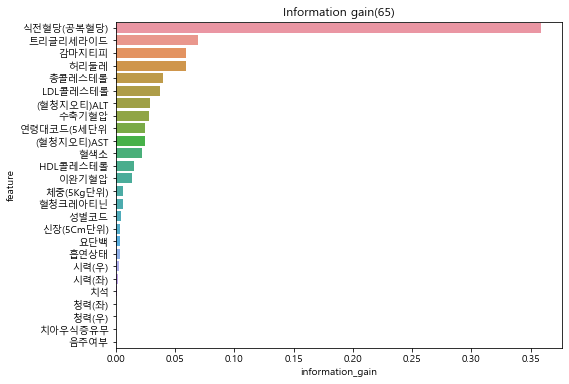

In [115]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl               # 한글깨짐
import matplotlib.font_manager as fm   # 한글깨짐
import matplotlib.font_manager         # 한글깨짐
# 결정트리에서 feature_importances_ # gridcv에는 없음
def Plot_feature_importance(df):
    font_name = mpl.font_manager.FontProperties(fname='C:/Windows/Fonts/malgun.ttf').get_name() # 폴더구분자 python / 임
    mpl.rc('font', family=font_name) 
    
#     mpl.rcParams['font.family'] = 'NanumGothic'
#     mpl.rc('axes', unicode_minus=False)
    
    plt.figure(figsize=(8,6))
    sns.barplot(x=df['information_gain'], y=df.index, orient="h")
    plt.title(f'Information gain(65)')
    plt.savefig(f'./img/information_gain_65.png', bbox_inches='tight') # dpi=100
#     plt.savefig('./img/model_importance.png')
#     plt.close(fig)
    plt.show()  
Plot_feature_importance(df_res)

<ipython-input-181-32bdd1d28f18>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  return np.sum(-p * np.log2(p) for p in probs)
<ipython-input-188-b14ab86d36ac>:15: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  plt.bar(positions, entropy, width=probability, color=colours[:len(probability)])


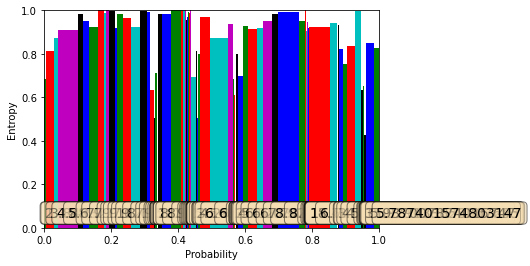

In [188]:
import matplotlib.pyplot as plt

colours = 'bgrcmk'  # An array of colours used during plotting later on.

# feature
def plot_entropy(probability, entropy, labels):
    """Graphical representation of entropy when splitting on each value"""

    # Some complex calculations to get the centre of the bars
    positions = np.array([0])
    positions = np.concatenate((positions, np.cumsum(probability)[:-1]))
    positions += np.divide(probability, 2)

    # Plot bars with colours
    plt.bar(positions, entropy, width=probability, color=colours[:len(probability)])

    # Set limits
    plt.ylim([0, 1])
    plt.xlim([0, 1])

    # Labels
    plt.ylabel("Entropy")
    plt.xlabel("Probability")

    # If labels are provided, plot some text
    if labels:
        props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
        for i, lab in enumerate(labels):
            # Plot text
            plt.text(positions[i], 0.1, lab, fontsize=14, verticalalignment='top', bbox=props)

# Plot for "cap-shape" feature
feature = X["수축기혈압"]
# Calculate probabilities and entropies
probs = class_probability(feature, y)
ents = class_entropy(feature, y)
labels = set(feature)
plot_entropy(probs, ents, labels)
plt.show() 

<ipython-input-181-32bdd1d28f18>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  return np.sum(-p * np.log2(p) for p in probs)
<ipython-input-188-b14ab86d36ac>:15: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  plt.bar(positions, entropy, width=probability, color=colours[:len(probability)])


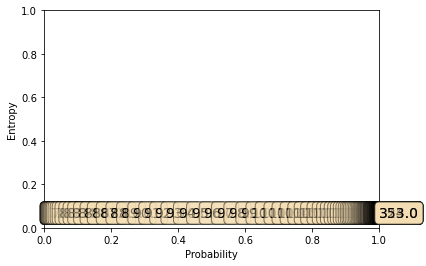

In [189]:
feature = X["A"]
probs = class_probability(feature, y)
ents = class_entropy(feature, y)
labels = set(feature)
plot_entropy(probs, ents, labels)
plt.show()

<ipython-input-181-32bdd1d28f18>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  return np.sum(-p * np.log2(p) for p in probs)
<ipython-input-188-b14ab86d36ac>:15: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  plt.bar(positions, entropy, width=probability, color=colours[:len(probability)])


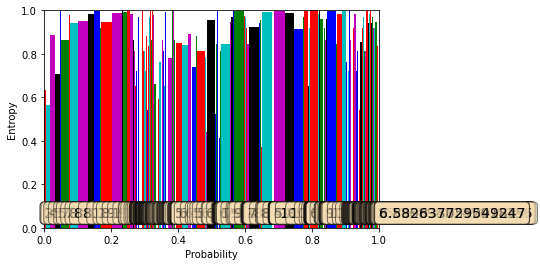

In [190]:
feature = X["허리둘레"]
probs = class_probability(feature, y)
ents = class_entropy(feature, y)
labels = set(feature)
plot_entropy(probs, ents, labels)
plt.show()